<a href="https://colab.research.google.com/github/Sushmit1480/MachineLearning/blob/main/ML_Practicla_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading or Uploading of the Dataset

In [24]:
from google.colab import files
uploaded = files.upload()

Saving diabetes997.csv to diabetes997 (1).csv


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

#Read Data

In [27]:
df  = pd.read_csv(io.BytesIO(uploaded['diabetes997.csv']))

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#Shape of the Dataset

In [29]:
df.shape

(768, 8)

#Information of dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


#Description of Dataset

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#Data Cleaning

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#Boxplotting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


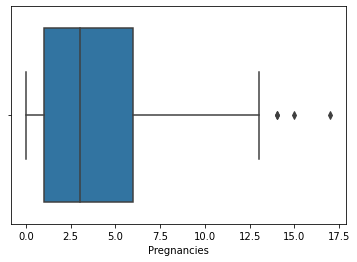

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


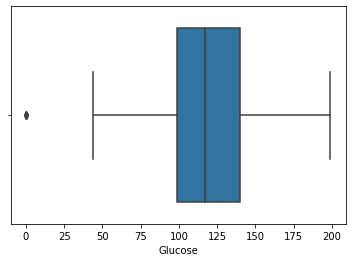

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


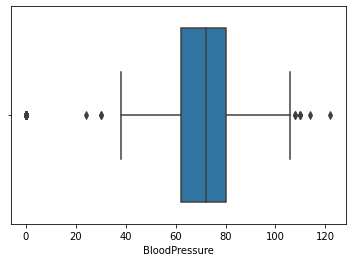

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


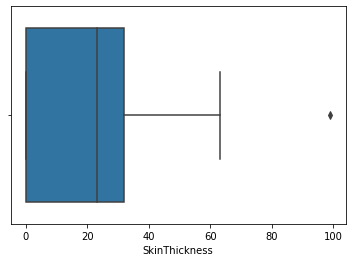

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


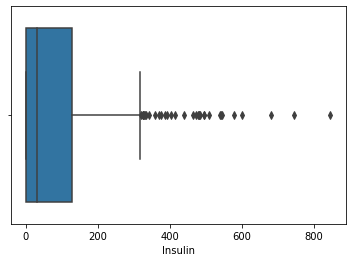

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


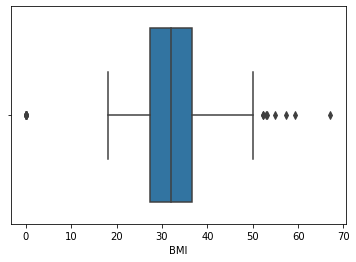

In [33]:
sns.boxplot(df['Pregnancies'])
plt.show()
sns.boxplot(df['Glucose'])
plt.show()
sns.boxplot(df['BloodPressure'])
plt.show()
sns.boxplot(df['SkinThickness'])
plt.show()
sns.boxplot(df['Insulin'])
plt.show()
sns.boxplot(df['BMI'])
plt.show()

#Finding Realtion between Age and Variables

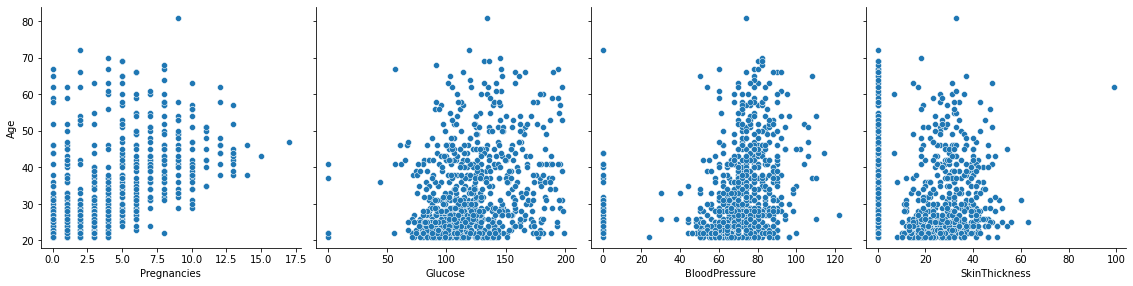

In [34]:
sns.pairplot(df, y_vars='Age', x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness'], height=4, aspect=1, kind='scatter')
plt.show()

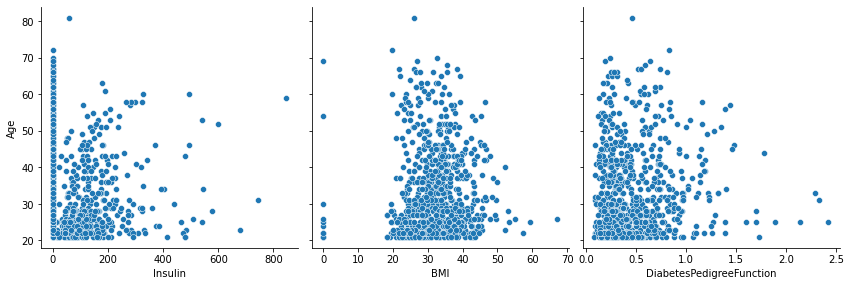

In [35]:
sns.pairplot(df, y_vars='Age', x_vars=['Insulin','BMI','DiabetesPedigreeFunction'], height=4, aspect=1, kind='scatter')
plt.show()

#Heatmap

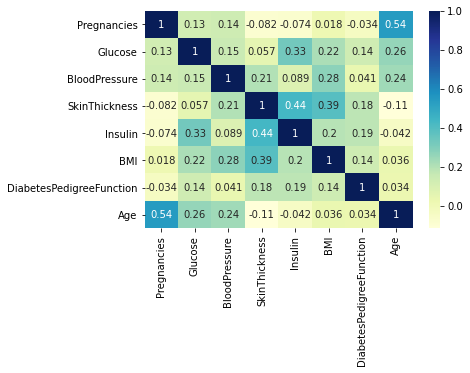

In [36]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#Preganancies seems more correlated to the age

#Model Building

In [41]:
X = df['BMI']
y = df['Age']


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
X_train.head()

155    50.0
150    37.4
78     43.2
9       0.0
142    32.5
Name: BMI, dtype: float64

In [45]:
y_train.head()

155    36
150    24
78     26
9      54
142    22
Name: Age, dtype: int64

In [48]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)

lin=sm.OLS(y_train, X_train_sm).fit()

In [49]:
lin.params

const    31.305399
BMI       0.057621
dtype: float64

#Printing Summary

In [50]:
print(lin.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8525
Date:                Wed, 10 Mar 2021   Prob (F-statistic):              0.356
Time:                        07:21:17   Log-Likelihood:                -2076.6
No. Observations:                 537   AIC:                             4157.
Df Residuals:                     535   BIC:                             4166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3054      2.033     15.399      0.0

#Virtualization of how weel of model fit the data

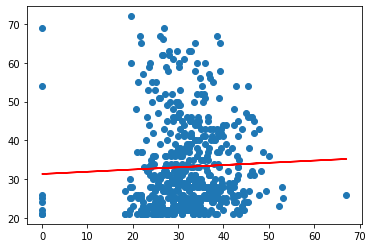

In [51]:
plt.scatter(X_train, y_train)
plt.plot(X_train,31.3054 + 0.0576*X_train, 'r')
plt.show()

#Model Evaluation

In [53]:
y_train_pred = lin.predict(X_train_sm)
res = (y_train - y_train_pred)

<Figure size 432x288 with 0 Axes>

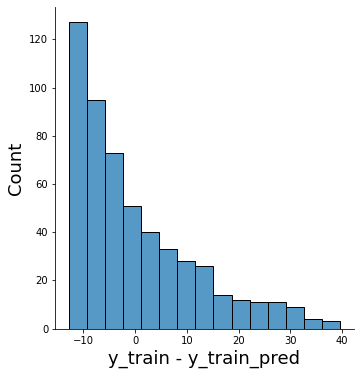

In [55]:
fig = plt.figure()
sns.displot(res, bins=15)
fig.suptitle('Error Terms', fontsize=18)
plt.xlabel('y_train - y_train_pred',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

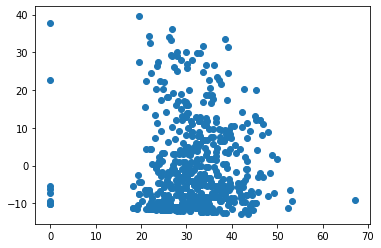

In [56]:
plt.scatter(X_train, res)

#Prediction on Test set

In [57]:
X_test_sm = sm.add_constant(X_test)
y_pred = lin.predict(X_test_sm)
y_pred.head()

173    33.811918
253    33.368235
207    33.477715
737    33.149275
191    33.212658
dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred))

12.152358747971366

In [67]:
r_squared = r2_score(y_test, y_pred)
r_squared

-0.00018518390946220542

#Visualizing data fit on test set

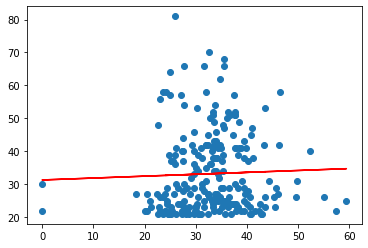

In [68]:
plt.scatter(X_test, y_test)
plt.plot(X_test,31.3054 + 0.0576 * X_test, 'r')
plt.show()